In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.datasets import load_wine

In [8]:
wine_data = load_wine(as_frame=True) 
data = wine_data.data  # Features as a pandas DataFrame
target = wine_data.target

In [10]:
wine_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [12]:
## Lets check the description of the dataset
print(wine_data.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

:Number of Instances: 178
:Number of Attributes: 13 numeric, predictive attributes and the class
:Attribute Information:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
    - class:
        - class_0
        - class_1
        - class_2

:Summary Statistics:

============================= ==== ===== ======= =====
                                Min   Max   Mean     SD
============================= ==== ===== ======= =====
Alcohol:                      11.0  14.8    13.0   0.8
Malic Acid:                   0.74  5.80    2.34  1.12
Ash:                          1.36  3.23    2.36  0.27
Alcalinity of Ash:            10.6  30.0    19.5   3.3
Magnesium:                    70.0 162.0    99.7  14.3

In [14]:
# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Pickle the scaler
import pickle

with open('standard_scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

## K-Means Clustering

Let’s apply K-Means clustering to the standardized data.

In [16]:
from sklearn.cluster import KMeans

# Choose the number of clusters
n_clusters = 3  # You can change this based on your needs

# Fit the K-Means model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(data_scaled)

# Get cluster labels
labels = kmeans.labels_

# Pickle the K-Means model
with open('kmeans_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

## Adding_Cluster_Labels_to_the_DataFrame

We’ll add the cluster labels back to the original DataFrame for analysis

In [18]:
# Add cluster labels to the DataFrame
data_with_labels = pd.DataFrame(data, columns=wine_data.feature_names)
data_with_labels['cluster'] = labels

# Display the first few rows of the DataFrame with cluster labels
print(data_with_labels.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  cluster  
0         

## Visualizing the Clusters

To visualize the clusters, we can use a scatter plot. Since we have many features, we'll use PCA (Principal Component Analysis) to reduce the dimensionality to 2D.

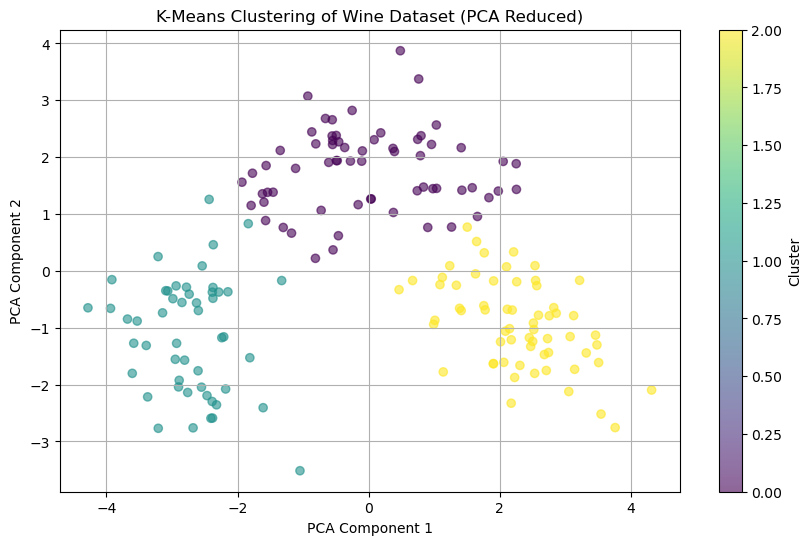

In [22]:
from sklearn.decomposition import PCA

# Reduce the data to 2D using PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data_pca, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = labels

# Plotting the clusters
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['PCA1'], pca_df['PCA2'], c=pca_df['cluster'], cmap='viridis', alpha=0.6)
plt.title('K-Means Clustering of Wine Dataset (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid()
plt.show()

# Analyzing cluster profiles

In [24]:

cluster_profile = data_with_labels.groupby('cluster').mean()
print(cluster_profile)

           alcohol  malic_acid       ash  alcalinity_of_ash   magnesium  \
cluster                                                                   
0        12.250923    1.897385  2.231231          20.063077   92.738462   
1        13.134118    3.307255  2.417647          21.241176   98.666667   
2        13.676774    1.997903  2.466290          17.462903  107.967742   

         total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
cluster                                                                     
0             2.247692    2.050000              0.357692         1.624154   
1             1.683922    0.818824              0.451961         1.145882   
2             2.847581    3.003226              0.292097         1.922097   

         color_intensity       hue  od280/od315_of_diluted_wines      proline  
cluster                                                                        
0               2.973077  1.062708                      2.803385   510.169231 

## Visualization of Clusters

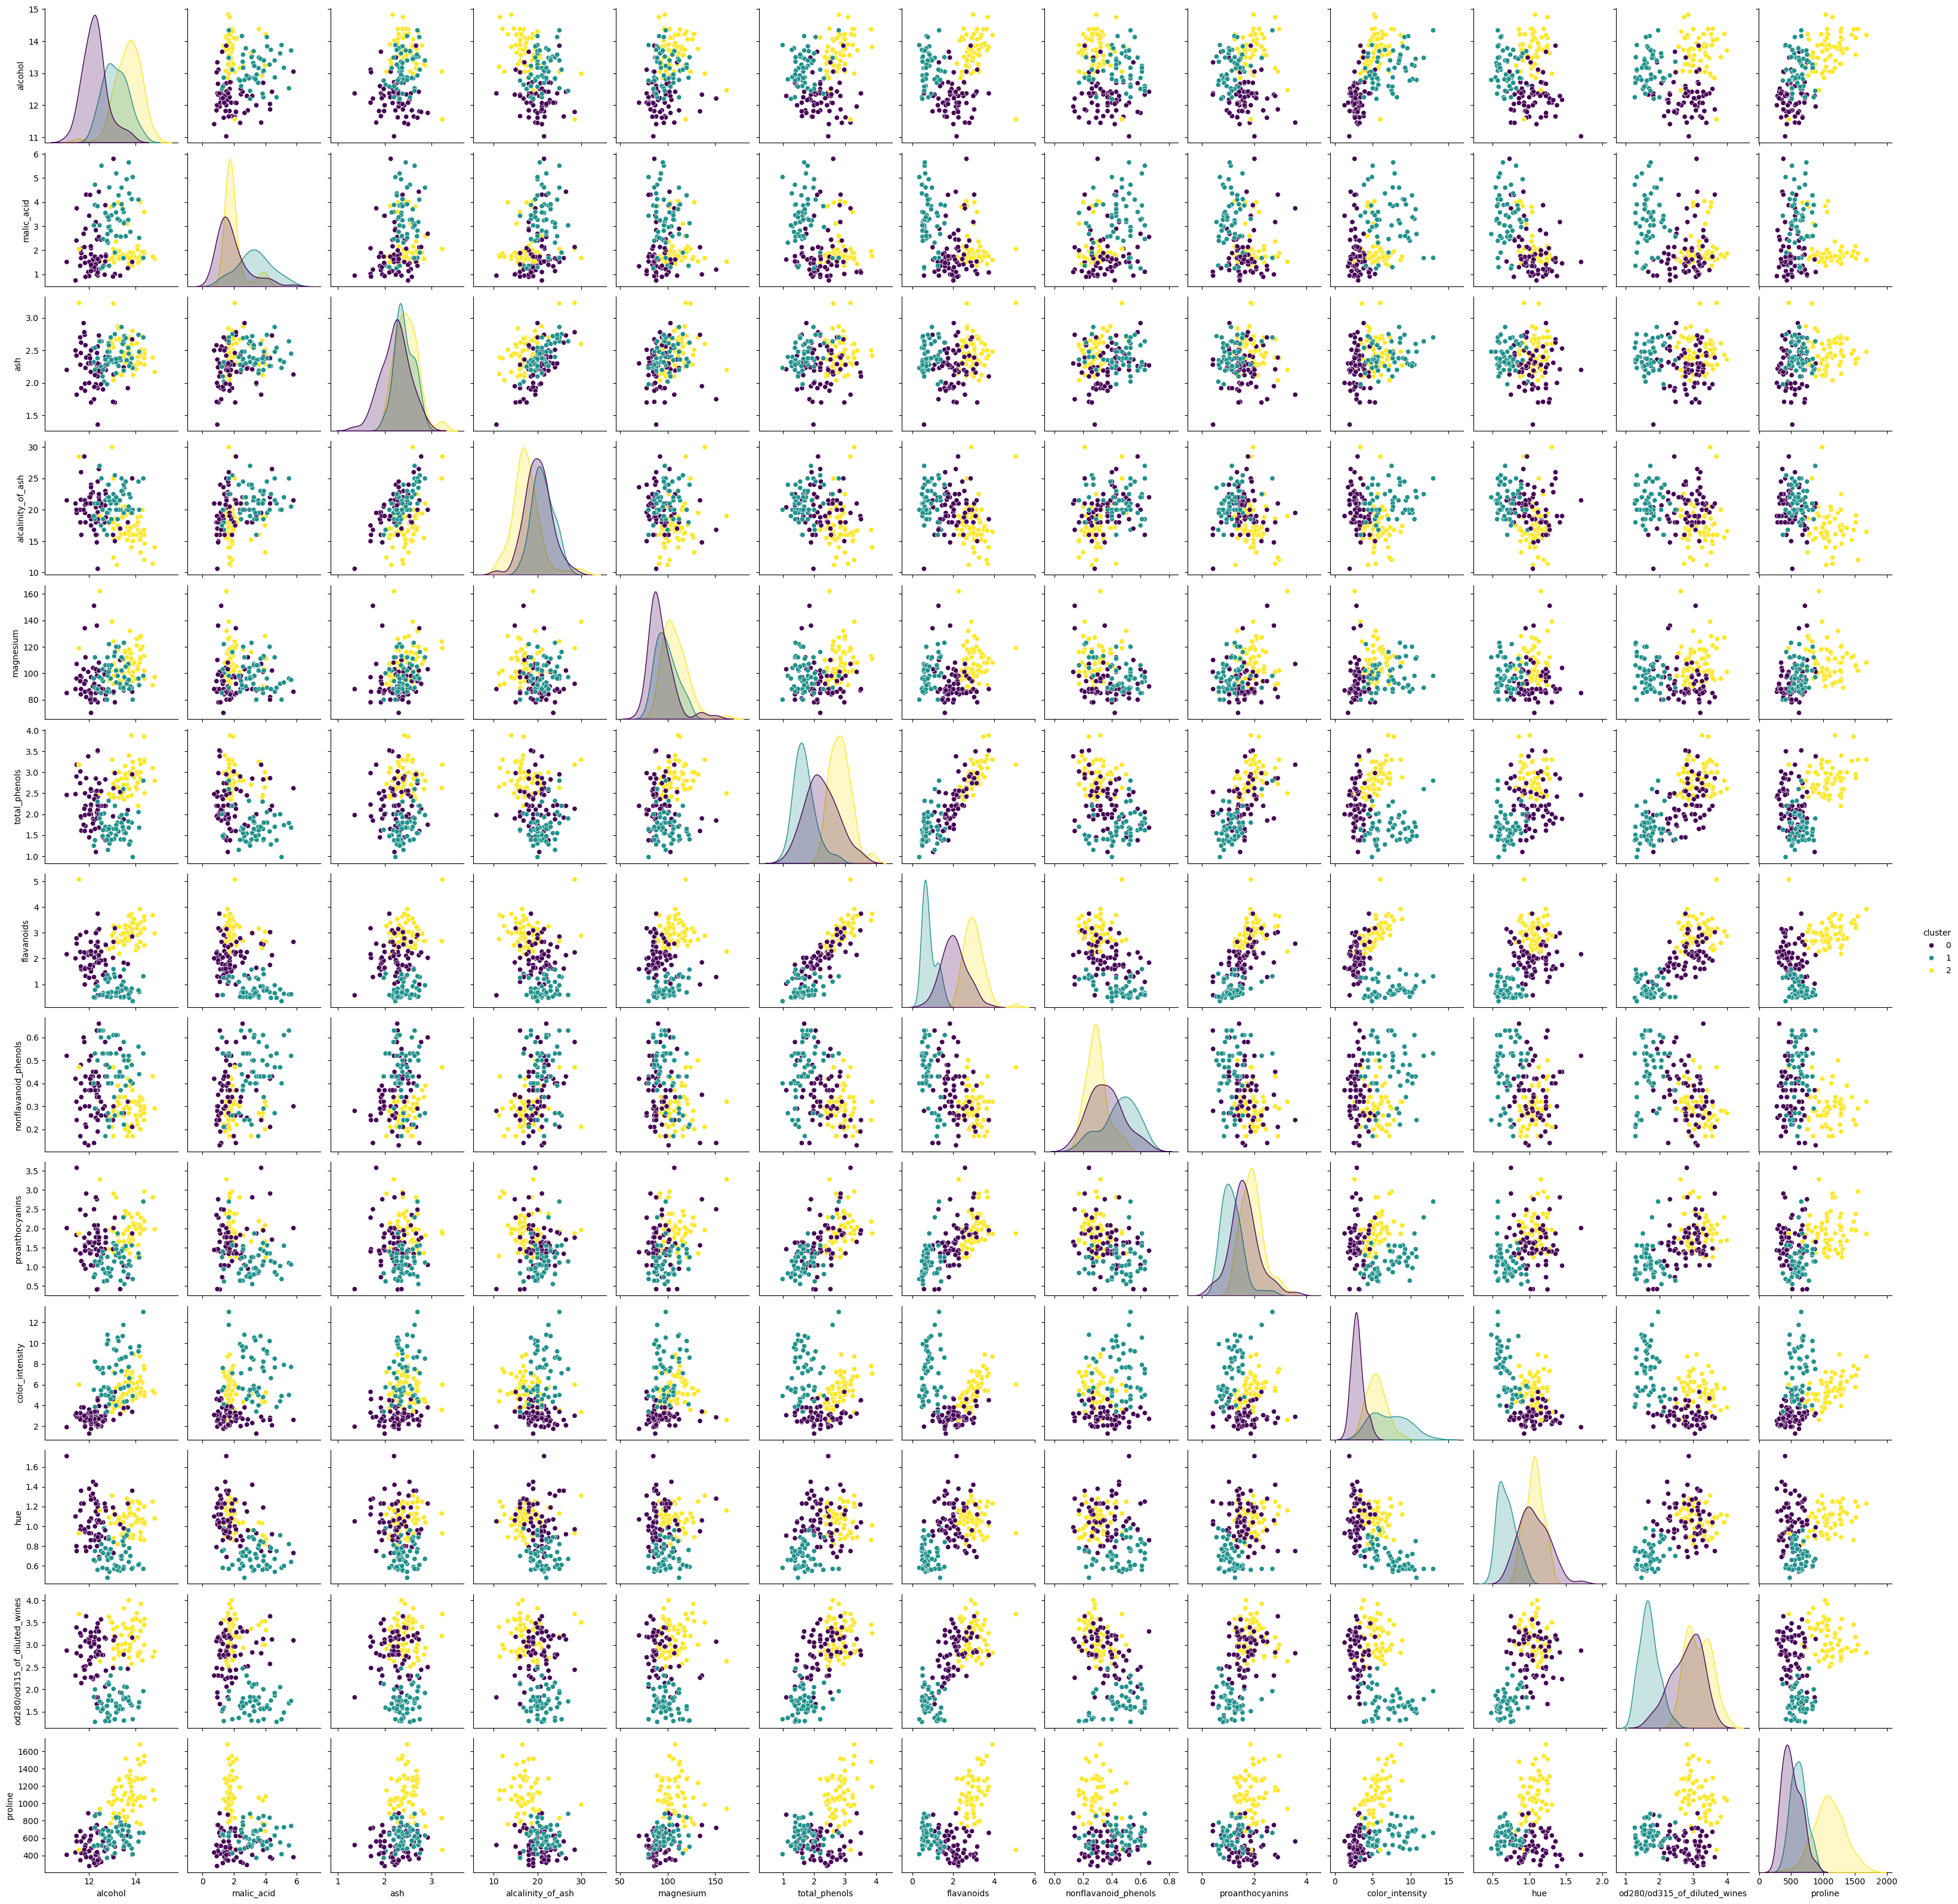

In [26]:
import seaborn as sns

sns.pairplot(data_with_labels, hue='cluster', palette='viridis')
plt.show()